In [3]:
using Plots

In [4]:
A = [2 1; 0 2]
λ, X = eig(A)

([2.0,2.0],
[1.0 -1.0; 0.0 4.44089e-16])

In [5]:
n = 10
A = randn(n,n); A = A'*A;

In [6]:
v = randn(n)
α = abs(v[1])
λ = 0
for k = 1:1000
    v = A*v
    v = v / norm(v)
    λ = dot(v,A*v)
    ϵ = abs(abs(v[1]) - α)
    α = abs(v[1])
    @printf "%3i  %10.2e\n" k ϵ
    ϵ ≤ 1e-6 && break
end;

  1    1.76e+00
  2    2.00e-01
  3    1.24e-01
  4    9.96e-02
  5    7.97e-02
  6    4.69e-02
  7    4.21e-02
  8    2.91e-02
  9    1.99e-02
 10    1.35e-02
 11    9.18e-03
 12    6.23e-03
 13    4.23e-03
 14    2.87e-03
 15    1.95e-03
 16    1.33e-03
 17    9.02e-04
 18    6.13e-04
 19    4.17e-04
 20    2.84e-04
 21    1.93e-04
 22    1.31e-04
 23    8.92e-05
 24    6.06e-05
 25    4.12e-05
 26    2.80e-05
 27    1.91e-05
 28    1.30e-05
 29    8.82e-06
 30    6.00e-06
 31    4.08e-06
 32    2.77e-06
 33    1.89e-06
 34    1.28e-06
 35    8.72e-07


In [7]:
λ, X = eig(A);
λ

10-element Array{Float64,1}:
  0.00182619
  0.153096  
  0.75672   
  0.848821  
  3.29998   
  5.26973   
 13.8176    
 15.5649    
 24.6827    
 36.2954    

In [8]:
[X[:,10]  v]

10×2 Array{Float64,2}:
 -0.186307    0.186305 
 -0.791742    0.791742 
 -0.10901     0.109009 
 -0.0714559   0.071456 
 -0.0527798   0.0527795
  0.0970046  -0.097006 
  0.0489655  -0.0489653
  0.334386   -0.334386 
 -0.297598    0.2976   
 -0.326302    0.326302 

In [9]:
dot(v,A*v)

36.295398759743875

## Page Rank

In [10]:
H = [ 0 1/2 1/2 0 0 0; 0 0 0 0 0 0; 1/3 1/3 0 0 1/3 0; 0 0 0 0 1/2 1/2; 0 0 0 1/2 0 1/2; 0 0 0 1 0 0 ]

6×6 Array{Float64,2}:
 0.0       0.5       0.5  0.0  0.0       0.0
 0.0       0.0       0.0  0.0  0.0       0.0
 0.333333  0.333333  0.0  0.0  0.333333  0.0
 0.0       0.0       0.0  0.0  0.5       0.5
 0.0       0.0       0.0  0.5  0.0       0.5
 0.0       0.0       0.0  1.0  0.0       0.0

In [11]:
λ, X = eig(H)

([0.408248,-0.408248,-0.5,1.0,-0.5,0.0],
[0.774597 0.774597 … -0.534522 -0.57735; 0.0 0.0 … 0.0 0.57735; … ; 0.0 0.0 … -0.267261 0.0; 0.0 0.0 … 0.534522 0.0])

In [12]:
v = X[:,4]

6-element Array{Float64,1}:
 0.111803
 0.0     
 0.223607
 0.559017
 0.559017
 0.559017

In [13]:
H1 = H; H1[2,:] = 1/6;
H1

6×6 Array{Float64,2}:
 0.0       0.5       0.5       0.0       0.0       0.0     
 0.166667  0.166667  0.166667  0.166667  0.166667  0.166667
 0.333333  0.333333  0.0       0.0       0.333333  0.0     
 0.0       0.0       0.0       0.0       0.5       0.5     
 0.0       0.0       0.0       0.5       0.0       0.5     
 0.0       0.0       0.0       1.0       0.0       0.0     

In [14]:
α = 0.6
H2 = α*H1 + (1-α)*ones(6,6)/6;
H2

6×6 Array{Float64,2}:
 0.0666667  0.366667   0.366667   0.0666667  0.0666667  0.0666667
 0.166667   0.166667   0.166667   0.166667   0.166667   0.166667 
 0.266667   0.266667   0.0666667  0.0666667  0.266667   0.0666667
 0.0666667  0.0666667  0.0666667  0.0666667  0.366667   0.366667 
 0.0666667  0.0666667  0.0666667  0.366667   0.0666667  0.366667 
 0.0666667  0.0666667  0.0666667  0.666667   0.0666667  0.0666667

In [15]:
λ, X = eig(H2')
v = X[:,1]
v = real(v) # remove small complex components

6-element Array{Float64,1}:
 0.236302
 0.307193
 0.255994
 0.605904
 0.418073
 0.492297


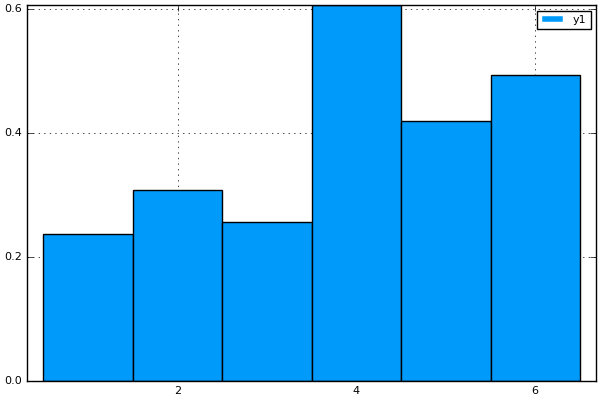

In [17]:
bar(v)

Perron-Frobenious Theorem guarantees that the leading eigenvalue is 1.

In [18]:
eigvals(H2)

6-element Array{Float64,1}:
  1.0     
  0.406724
 -0.246999
 -0.059725
 -0.3     
 -0.3     

In [19]:
A = H2'; n = size(A,1)
v = randn(n)
α = abs(v[1])
λ = 0
for k = 1:1000
    v = A*v
    v = v / norm(v)
    λ = dot(v,A*v)
    ϵ = abs(abs(v[1]) - α)
    α = abs(v[1])
    @printf "%3i  %10.2e\n" k ϵ
    ϵ ≤ 1e-6 && break
end;

  1    5.66e-01
  2    1.58e-01
  3    6.00e-02
  4    5.71e-03
  5    4.74e-03
  6    4.13e-04
  7    4.59e-04
  8    1.47e-04
  9    5.84e-05
 10    2.79e-05
 11    9.00e-06
 12    4.69e-06
 13    1.51e-06
 14    7.60e-07


## Inverse power method

In [20]:
A = diagm([1.0j for j in 1:32]);

In [21]:
n = size(A,1)
v = randn(n)
α = -1; s = 1
d = []
for k=1:10
    v = (A - α*eye(n))\v
    v = v / norm(v)
    λ = dot(v,A*v)
    push!(d, abs(λ-s))
end;


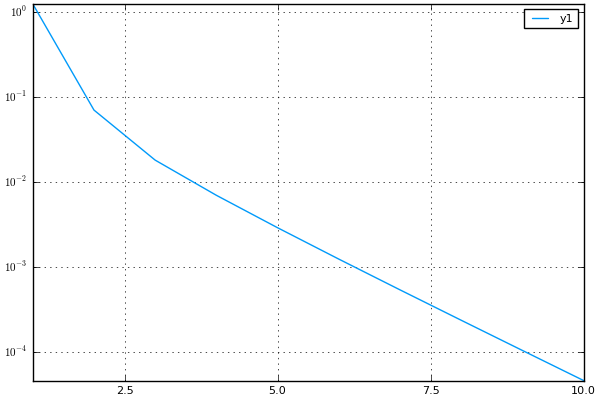

In [22]:
plot(d,yscale=:log10)

## Inverse power method

In [23]:
n = 32
# diagonal matrix:
A = diagm( [ 1.0*i for i=1:n ] ); 

In [24]:
α = 0
n = size(A,1)
v = randn(n)
err = []
for k = 1:100
    v = (A - α*eye(n))\v
    v /= norm(v)
    λ = dot(v, A*v)
    push!(err, λ)
end;


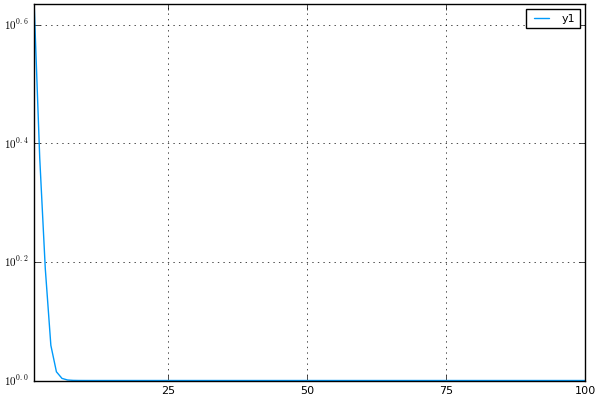

In [25]:
plot(err,yscale=:log10)